In [2]:
import torch
import torch.nn.functional as F

In [3]:
t = torch.rand(1,3,768)
t

tensor([[[0.6493, 0.6608, 0.9028,  ..., 0.1946, 0.6678, 0.6689],
         [0.1955, 0.0763, 0.2471,  ..., 0.7317, 0.6310, 0.0288],
         [0.0218, 0.5576, 0.7299,  ..., 0.8575, 0.7537, 0.1901]]])

In [4]:
t = t.flatten(start_dim=1, end_dim=2)

In [4]:
t

tensor([[0.2490, 0.8972, 0.4271,  ..., 0.3815, 0.2262, 0.1916]])

In [5]:
t[0]

tensor([0.2490, 0.8972, 0.4271,  ..., 0.3815, 0.2262, 0.1916])

In [6]:
#t.add()

In [7]:
t.shape[1]

2304

In [5]:
s = torch.zeros(1,76800-t.shape[1])

In [6]:
p = torch.cat((t,s),dim=1)

In [7]:
import pandas as pd

In [14]:
new_t = torch.rand(3,768001)

In [15]:
df = pd.DataFrame(new_t.numpy())

In [13]:
new_t

tensor([[0.5827, 0.6420, 0.6486,  ..., 0.2555, 0.0691, 0.5853],
        [0.2514, 0.6689, 0.8804,  ..., 0.6812, 0.3419, 0.8391],
        [0.4334, 0.0039, 0.5057,  ..., 0.4188, 0.2633, 0.5829]])

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,767991,767992,767993,767994,767995,767996,767997,767998,767999,768000
0,0.955652,0.098126,0.751082,0.685012,0.143723,0.867277,0.035842,0.555974,0.906207,0.420464,...,0.966071,0.873707,0.986390,0.628676,0.149726,0.103987,0.544149,0.996392,0.314117,0.400549
1,0.186168,0.382381,0.472286,0.143132,0.086060,0.469927,0.430843,0.335415,0.607442,0.598190,...,0.369618,0.260195,0.365102,0.336576,0.930391,0.127194,0.231761,0.563690,0.093264,0.071561
2,0.434291,0.451287,0.311573,0.841874,0.099751,0.057728,0.831138,0.161115,0.376139,0.294774,...,0.708445,0.112542,0.249618,0.419617,0.346659,0.213575,0.947475,0.939074,0.911157,0.867900


In [13]:
df[76800] = [0.78]

In [18]:
!pip install sklearn


  Using cached sklearn-0.0-py2.py3-none-any.whl


You should consider upgrading via the 'd:\adi\work\clg\capstone\capstone\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)
df2 = df1

In [20]:
df2

,0,1,2,3,4,5,6,7,8,9,...,767991,767992,767993,767994,767995,767996,767997,767998,767999,768000
0,1.000000,0.000000,1.000000,0.775508,1.000000,1.000000,0.000000,1.000000,1.000000,0.414251,...,1.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.436471,1.000000,0.270026,0.413126
1,0.000000,0.804888,0.365664,0.000000,0.000000,0.509171,0.496671,0.441422,0.436364,1.000000,...,0.00000,0.193983,0.156743,0.00000,1.000000,0.211767,0.000000,0.000000,0.000000,0.000000
2,0.322453,1.000000,0.000000,1.000000,0.237425,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.56807,0.000000,0.000000,0.28429,0.252263,1.000000,1.000000,0.867533,1.000000,1.000000


In [21]:
input_cols = list(df.columns)[0:76800]
len(input_cols)

76800

In [22]:
output_cols = [76800]
output_cols

[76800]

In [24]:
df = df2

In [26]:
def dataframe_to_arrays(df):
    # Make a copy of the original dataframe
    df5 = df.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = df[input_cols].to_numpy()
    targets_array = df[output_cols].to_numpy()
    return inputs_array, targets_array

In [27]:
inputs_array, targets_array = dataframe_to_arrays(df)
inputs_array, targets_array

(array([[1.        , 0.        , 1.        , ..., 0.        , 0.3639754 ,
         0.2775687 ],
        [0.        , 0.80488753, 0.36566412, ..., 1.        , 1.        ,
         1.0000001 ],
        [0.32245332, 1.        , 0.        , ..., 0.24601266, 0.        ,
         0.        ]], dtype=float32),
 array([[0.99999994],
        [0.        ],
        [0.39303517]], dtype=float32))

In [28]:
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)

In [24]:
df[output_cols]

,76800
0,0.78


In [29]:
from torch.utils.data import DataLoader, TensorDataset, random_split
dataset = TensorDataset(inputs, targets)

In [32]:
num_rows = len(df)
val_percent = 0.5
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_df, val_df = random_split(dataset, [train_size, val_size]) 

In [33]:
print(len(train_df))
print(len(val_df))

2
1


In [34]:
batch_size = 1

In [35]:
train_loader = DataLoader(train_df, batch_size, shuffle=True)
val_loader = DataLoader(val_df, batch_size)

In [36]:
input_size = len(input_cols)
output_size = 1
print(input_size)
print(output_size)

76800
1


In [37]:
import torch.nn as nn
import torch.nn.functional as F
class GradingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size,2000)
        self.fc2 = nn.Linear(2000,3000)
        self.fc3 = nn.Linear(3000,2000)
        self.fc4 = nn.Linear(2000,1000)
        self.fc5 = nn.Linear(1000,5)
        self.fc6 = nn.Linear(5,output_size)
    def forward(self, xb):
        xb = F.relu(self.fc1(xb))
        xb = F.relu(self.fc2(xb))
        xb = F.relu(self.fc3(xb))
        xb = F.relu(self.fc4(xb))
        xb = F.relu(self.fc5(xb))
        xb = F.relu(self.fc6(xb))      # batch wise forwarding
        return xb
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)         
        # Calcuate loss
        loss = F.l1_loss(out, targets)  # batch wise training step and loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss =F.l1_loss(out, targets)       # batch wise validation and loss    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine val losses of all batches as average
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [38]:
def evaluate2(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    lr,
    model,
    train_loader,
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate2(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)  
    return history

In [39]:
model2 =  GradingModel()
result = evaluate2(model2,val_loader)
print(result)

{'val_loss': 0.3930351734161377}


In [40]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0) 
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [41]:
input, target = val_df[0]
predict_single(input, target, model2)

Input: tensor([0.3225, 1.0000, 0.0000,  ..., 0.2460, 0.0000, 0.0000])
Target: tensor([0.3930])
Prediction: tensor([0.])


In [44]:
epochs = 1
lr = 1e-3
history5 = fit(epochs, lr, model2, train_loader, val_loader)

Epoch [1], val_loss: 0.3930


In [45]:
input, target = val_df[0]
predict_single(input, target, model2)

Input: tensor([0.3225, 1.0000, 0.0000,  ..., 0.2460, 0.0000, 0.0000])
Target: tensor([0.3930])
Prediction: tensor([0.])


In [46]:
def predict_right(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    if abs(prediction - target) < 0.33:
        return 1
    else:
        return 0

In [47]:
results = []
for i in range(0,len(val_df)):
    input, target = val_df[i]
    results.append(predict_right(input, target, model2))

In [48]:
count = 0
for i in results:
    if i == 1:
        count+=1

In [49]:
count

0

In [50]:
results

[0]

In [51]:
count/len(val_df)

0.0

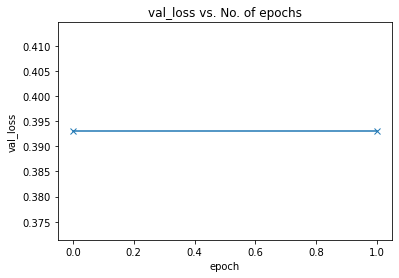

In [52]:
import matplotlib.pyplot as plt
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]